In [1]:
!pip install praw
import requests
import pandas as pd
import praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.9 MB/s eta 0:00:00


In [2]:
# credentials
reddit = praw.Reddit(client_id='655ZwU8ZP3vWCfmj8s_dRg',
                     client_secret='Pm3bqlnaWoK5YN1WoPZSqGGSnQvlWA',
                     user_agent='bevscrape')

In [6]:
# loading in a subreddit of interest
all_pol_data = reddit.subreddit('politics')

# creating a list of all the posts to choose from the subreddit that fit the criteria
# limited it to the top posts of this year to keep the analysis somewhat relevant
megaposts = []

for post in all_pol_data.top('year', limit = 30):
  if post.num_comments > 1000:
    megaposts.append(post)

for megapost in megaposts:
  print(f'Title: {megapost.title}\n# of Comments: {megapost.num_comments}\n')

# finding a post that is interesting to me
post = megaposts[9]
print(f'THE POST USED FOR THIS STUDY IS "{post.title}"')

<ipython-input-6-f006e0cdc0fd>:8: DeprecationWarning: Positional arguments for 'BaseListingMixin.top' will no longer be supported in PRAW 8.
Call this function with 'time_filter' as a keyword argument.
  for post in all_pol_data.top('year', limit = 30):
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Title: Ocasio-Cortez calls for Thomas impeachment after report of undisclosed gifts from GOP donor
# of Comments: 3384

Title: Biden to propose 25% billionaire tax
# of Comments: 6040

Title: Bernie Sanders says it's time for a four-day work week
# of Comments: 4216

Title: North Dakota senators vote to boost their own meal reimbursements after rejecting free school lunch bill
# of Comments: 2802

Title: Parent Calls Bible ‘Porn’ and Demands Utah School District Remove It From Libraries
# of Comments: 3970

Title: Bombshell Audio Shows Ted Cruz Scheming to Steal Election
# of Comments: 4462

Title: Jury finds Donald Trump sexually abused E. Jean Carroll in civil case
# of Comments: 5017

Title: Megathread: Manhattan Grand Jury Votes To Indict Trump
# of Comments: 27350

Title: Bernie Sanders: ‘Oligarchs run Russia. But guess what? They run the US as well’
# of Comments: 2973

Title: The American public no longer believes the Supreme Court is impartial
# of Comments: 3771

Title: Claren

In [7]:
# setting the URL for the post and creating an object called 'entry' to store the post in

url = 'https://www.reddit.com/r/politics/comments/1092xhl/the_american_public_no_longer_believes_the/'

entry = reddit.submission(url=url)

In [8]:
# creating a loop that filters for certain objects such as "Load More Comments" and also removes any deleted comments
# data frame is then created using the remaining comments (115 total base comments)
from praw.models import MoreComments

comments = []

for comment in entry.comments:
  if type(comment) == MoreComments:
	  continue
  if comment.body != '[deleted]':
    comments.append([comment.body])

com_df = pd.DataFrame(comments, columns=['comment'])
com_df.shape
com_df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,comment
0,"\nAs a reminder, this subreddit [is for civil ..."
1,Because there's no reason to think they're imp...
2,They're not wrong.
3,When the wife of a Supreme Court Justice atten...
4,Yup. When repubs (specifically Senator McConn...
...,...
109,They haven’t been for a long time. They are be...
110,"The truth is that, except for the 15 years or ..."
111,They have openly been rebulican..... I wonder ...
112,"Going back to 1992, the Republican Party has w..."


In [15]:
# updating the data frame to include all replies to each comment, as well as adding columns such as timestamps, IDs, scores, and # of upvotes
post_comments = []

entry.comments.replace_more(limit=None)
for comment in entry.comments.list():
 post_comments.append([comment.body, comment.ups, comment.downs, comment.score, comment.id, comment.created])


com_df = pd.DataFrame(post_comments, columns=['comment', 'ups', 'downs', 'score', 'ID', 'date'])
com_df.shape
com_df

,comment,ups,downs,score,ID,date
0,"\nAs a reminder, this subreddit [is for civil ...",1,0,1,j3vqpob,1.673438e+09
1,Because there's no reason to think they're imp...,11140,0,11140,j3vt4y9,1.673440e+09
2,They're not wrong.,4500,0,4500,j3vrddo,1.673439e+09
3,[deleted],601,0,601,j3vt4qp,1.673440e+09
4,When the wife of a Supreme Court Justice atten...,5335,0,5335,j3vtqy7,1.673440e+09
...,...,...,...,...,...,...
3555,It can be the case that the U S government as ...,1,0,1,j45gcoi,1.673597e+09
3556,It's all very basic logic.\n\nLaws are written...,1,0,1,j3y15na,1.673471e+09
3557,My point is that both sides are at a stalemate...,1,0,1,j44vdq6,1.673584e+09
3558,"Wow, you are actually so smart, thanks for bre...",2,0,2,j3y2nsh,1.673472e+09


In [17]:
# changing date variable into a readable measure (mm/dd/yyyy)
from datetime import datetime

com_df['date'] = pd.to_datetime(com_df['date'], unit='s')
com_df['date'] = com_df['date'].dt.strftime('%m-%d-%Y')

com_df

,comment,ups,downs,score,ID,date
0,"\nAs a reminder, this subreddit [is for civil ...",1,0,1,j3vqpob,01-11-2023
1,Because there's no reason to think they're imp...,11140,0,11140,j3vt4y9,01-11-2023
2,They're not wrong.,4500,0,4500,j3vrddo,01-11-2023
3,[deleted],601,0,601,j3vt4qp,01-11-2023
4,When the wife of a Supreme Court Justice atten...,5335,0,5335,j3vtqy7,01-11-2023
...,...,...,...,...,...,...
3555,It can be the case that the U S government as ...,1,0,1,j45gcoi,01-13-2023
3556,It's all very basic logic.\n\nLaws are written...,1,0,1,j3y15na,01-11-2023
3557,My point is that both sides are at a stalemate...,1,0,1,j44vdq6,01-13-2023
3558,"Wow, you are actually so smart, thanks for bre...",2,0,2,j3y2nsh,01-11-2023


In [18]:
# removing duplicates and exporting the data frame as a csv file
# 3,419 total comments used for the sentiment analysis

output = com_df
output.drop_duplicates(subset='comment', keep='last', inplace=True)
output.to_csv('scotus_coms.csv', index=True, header=True)
output.shape

(3418, 6)

**PRE-PROCESSING**

In [19]:
import seaborn as sns
import numpy as np

In [20]:
# loading in the csv file made above with all the usable comments
# first look at data
scotus = pd.read_csv('scotus_coms.csv')
scotus.shape
scotus.head()

,Unnamed: 0,comment,ups,downs,score,ID,date
0,0,"\nAs a reminder, this subreddit [is for civil ...",1,0,1,j3vqpob,01-11-2023
1,1,Because there's no reason to think they're imp...,11140,0,11140,j3vt4y9,01-11-2023
2,2,They're not wrong.,4500,0,4500,j3vrddo,01-11-2023
3,4,When the wife of a Supreme Court Justice atten...,5335,0,5335,j3vtqy7,01-11-2023
4,5,Yup. When repubs (specifically Senator McConn...,1939,0,1939,j3vs7oi,01-11-2023


In [21]:
# removing unnecessary columns

scotus = scotus.drop(columns = ['Unnamed: 0', 'downs'], axis = 1)
scotus.head()

,comment,ups,score,ID,date
0,"\nAs a reminder, this subreddit [is for civil ...",1,1,j3vqpob,01-11-2023
1,Because there's no reason to think they're imp...,11140,11140,j3vt4y9,01-11-2023
2,They're not wrong.,4500,4500,j3vrddo,01-11-2023
3,When the wife of a Supreme Court Justice atten...,5335,5335,j3vtqy7,01-11-2023
4,Yup. When repubs (specifically Senator McConn...,1939,1939,j3vs7oi,01-11-2023


In [22]:
# pre-processing data, using regular expressions and stop words to remove symbols and white space
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


def reddit_clean (redd):
    redd = str(redd).lower()
    redd = re.sub("'", "", redd)
    redd = re.sub("@[A-Za-z0-9_]+","", redd)
    redd = re.sub("#[A-Za-z0-9_]+","", redd)
    redd = re.sub(r"www.\S+", "", redd)
    redd = re.sub(r"http\S+", "", redd)
    redd = re.sub('[()!?]', ' ', redd)
    redd = re.sub('\[.*?\]',' ', redd)
    redd = re.sub("[^a-z0-9]"," ", redd)
    redd = re.sub(r"\b\w{1,3}\b"," ", redd)
    redd = redd.split()
    stopwords = STOPWORDS
    redd = [w for w in redd if not w in stopwords]
    redd = " ".join(word for word in redd)
    return redd

scotus['comment'] = scotus['comment'].apply(reddit_clean)
scotus.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,comment,ups,score,ID,date
0,reminder subreddit politics wiki index general...,1,1,j3vqpob,01-11-2023
1,theres reason think theyre impartial impossibl...,11140,11140,j3vt4y9,01-11-2023
2,theyre wrong,4500,4500,j3vrddo,01-11-2023
3,wife supreme court justice attends insurrectio...,5335,5335,j3vtqy7,01-11-2023
4,repubs specifically senator mcconnell used dub...,1939,1939,j3vs7oi,01-11-2023


In [23]:
# tokenizing each comment
tokenized_scotus = scotus['comment'].apply(lambda x: x.split())
print(tokenized_scotus)

0       [reminder, subreddit, politics, wiki, index, g...
1       [theres, reason, think, theyre, impartial, imp...
2                                         [theyre, wrong]
3       [wife, supreme, court, justice, attends, insur...
4       [repubs, specifically, senator, mcconnell, use...
                              ...                        
3413    [case, government, idea, going, also, case, sl...
3414    [basic, logic, laws, written, passed, people, ...
3415    [point, sides, stalemate, dont, want, thanks, ...
3416    [actually, smart, thanks, breaking, luckily, p...
3417    [address, actually, saying, interest, honest, ...
Name: comment, Length: 3418, dtype: object


In [24]:
# stemming each comment and creating a new column in the data frame that includes the tokenized version of each comment
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_scotus = tokenized_scotus.apply(lambda x: [stemmer.stem(i) for i in x])
scotus['tokenized']= tokenized_scotus
scotus.head()

,comment,ups,score,ID,date,tokenized
0,reminder subreddit politics wiki index general...,1,1,j3vqpob,01-11-2023,"[remind, subreddit, polit, wiki, index, gener,..."
1,theres reason think theyre impartial impossibl...,11140,11140,j3vt4y9,01-11-2023,"[there, reason, think, theyr, imparti, imposs,..."
2,theyre wrong,4500,4500,j3vrddo,01-11-2023,"[theyr, wrong]"
3,wife supreme court justice attends insurrectio...,5335,5335,j3vtqy7,01-11-2023,"[wife, suprem, court, justic, attend, insurrec..."
4,repubs specifically senator mcconnell used dub...,1939,1939,j3vs7oi,01-11-2023,"[repub, specif, senat, mcconnel, use, dubiou, ..."


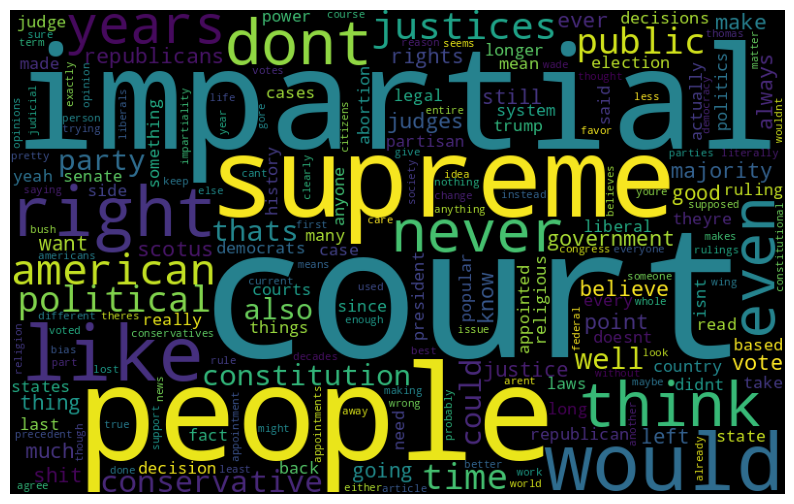

In [25]:
# creating the word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import collections

all_words = ' '.join([text for text in scotus['comment']])
word_count = collections.Counter(all_words.split())

wordcloud = WordCloud(width=800, height=500)
wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [26]:
# not necessary for the assignment, but helps me get a more quantitative look on how frequently each top word appears
import itertools

count_word = collections.Counter(all_words.split())
print(f'**Top Words Frequency Chart**\n')
for word, count in count_word.most_common(15):
  print(f'{word}: {count}')

**Top Words Frequency Chart**

court: 935
impartial: 583
people: 561
supreme: 480
would: 412
like: 386
right: 369
dont: 298
think: 292
even: 276
never: 273
years: 229
american: 216
justices: 215
political: 215


In [27]:
# creating functions to retrieve polarity and subjectivity of each comment
from textblob import TextBlob

def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def get_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

In [28]:
# creating polarity and subjectivity columns that hold their respective values for each comment
scotus['polarity'] = scotus['comment'].apply(get_polarity)
scotus['subjectivity'] = scotus['comment'].apply(get_subjectivity)
scotus.tail()

,comment,ups,score,ID,date,tokenized,polarity,subjectivity
3413,case government idea going also case slow reac...,1,1,j45gcoi,01-13-2023,"[case, govern, idea, go, also, case, slow, rea...",-0.040000,0.69000
3414,basic logic laws written passed people elected...,1,1,j3y15na,01-11-2023,"[basic, logic, law, written, pass, peopl, elec...",-0.100000,0.24500
3415,point sides stalemate dont want thanks governm...,1,1,j44vdq6,01-13-2023,"[point, side, stalem, dont, want, thank, gover...",0.200000,0.55000
3416,actually smart thanks breaking luckily players...,2,2,j3y2nsh,01-11-2023,"[actual, smart, thank, break, luckili, player,...",0.535119,0.66369
3417,address actually saying interest honest discus...,0,0,j3y3mr4,01-11-2023,"[address, actual, say, interest, honest, discuss]",0.300000,0.50000


In [29]:
# creating a function to sort polarity values into three different bins
# then creating a new column that lists which bin each comment is in
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    if sentiment_polarity > 0:
        return 'Positive Sentiment'
    elif sentiment_polarity == 0:
        return 'Neutral Sentiment'
    else:
        return 'Negative Sentiment'

scotus['sentiment'] = scotus['comment'].apply(analyze_sentiment)
scotus.head()

,comment,ups,score,ID,date,tokenized,polarity,subjectivity,sentiment
0,reminder subreddit politics wiki index general...,1,1,j3vqpob,01-11-2023,"[remind, subreddit, polit, wiki, index, gener,...",0.100893,0.533929,Positive Sentiment
1,theres reason think theyre impartial impossibl...,11140,11140,j3vt4y9,01-11-2023,"[there, reason, think, theyr, imparti, imposs,...",-0.666667,1.000000,Negative Sentiment
2,theyre wrong,4500,4500,j3vrddo,01-11-2023,"[theyr, wrong]",-0.500000,0.900000,Negative Sentiment
3,wife supreme court justice attends insurrectio...,5335,5335,j3vtqy7,01-11-2023,"[wife, suprem, court, justic, attend, insurrec...",0.000000,0.000000,Neutral Sentiment
4,repubs specifically senator mcconnell used dub...,1939,1939,j3vs7oi,01-11-2023,"[repub, specif, senat, mcconnel, use, dubiou, ...",-0.080159,0.467063,Negative Sentiment


In [30]:
# creating another new column that defines which comments are subjective and which are objective
scotus['subjective?'] = np.where(scotus['subjectivity'] > 0.5, 'Subjective', 'Objective')
scotus.head()

,comment,ups,score,ID,date,tokenized,polarity,subjectivity,sentiment,subjective?
0,reminder subreddit politics wiki index general...,1,1,j3vqpob,01-11-2023,"[remind, subreddit, polit, wiki, index, gener,...",0.100893,0.533929,Positive Sentiment,Subjective
1,theres reason think theyre impartial impossibl...,11140,11140,j3vt4y9,01-11-2023,"[there, reason, think, theyr, imparti, imposs,...",-0.666667,1.000000,Negative Sentiment,Subjective
2,theyre wrong,4500,4500,j3vrddo,01-11-2023,"[theyr, wrong]",-0.500000,0.900000,Negative Sentiment,Subjective
3,wife supreme court justice attends insurrectio...,5335,5335,j3vtqy7,01-11-2023,"[wife, suprem, court, justic, attend, insurrec...",0.000000,0.000000,Neutral Sentiment,Objective
4,repubs specifically senator mcconnell used dub...,1939,1939,j3vs7oi,01-11-2023,"[repub, specif, senat, mcconnel, use, dubiou, ...",-0.080159,0.467063,Negative Sentiment,Objective


In [31]:
# descriptive statistics on polarity and subjectivity
pol_sub = scotus[['polarity', 'subjectivity']]
pol_sub.describe()

,polarity,subjectivity
count,3418.000000,3418.000000
mean,0.029583,0.343128
std,0.226230,0.294501
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.350000
75%,0.116536,0.550000
max,1.000000,1.000000


In [32]:
# polarity frequency table
scotus['sentiment'].value_counts()

Positive Sentiment    1294
Neutral Sentiment     1281
Negative Sentiment     843
Name: sentiment, dtype: int64

In [33]:
# subjectivity frequency table
scotus['subjective?'].value_counts()

Objective     2372
Subjective    1046
Name: subjective?, dtype: int64

In [34]:
# running the crosstab of polarity and subjectivity
pd.crosstab(scotus['sentiment'], scotus['subjective?'])

subjective?,Objective,Subjective
sentiment,,
Negative Sentiment,399,444
Neutral Sentiment,1244,37
Positive Sentiment,729,565


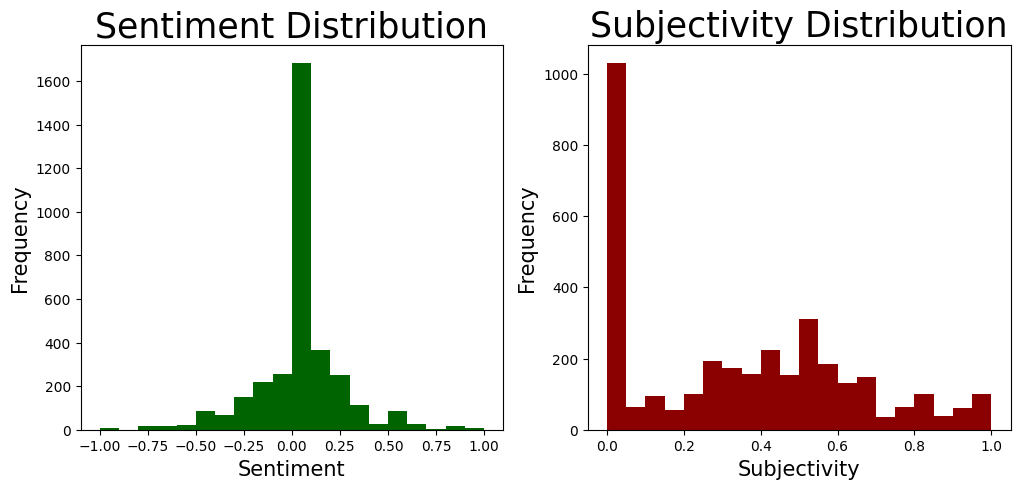

In [35]:
# creating side-by-side histograms of polarity and subjectivity
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1, figsize=[12, 5])

plt.subplot(1, 2, 1)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=10)
plt.hist(scotus['polarity'], color = 'darkgreen', bins=20)
plt.title('Sentiment Distribution', fontsize=25)

plt.subplot(1, 2, 2)
plt.xlabel('Subjectivity', fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=10)
plt.hist(scotus['subjectivity'], color = 'darkred', bins=20)
plt.title('Subjectivity Distribution', fontsize=25)

plt.show()

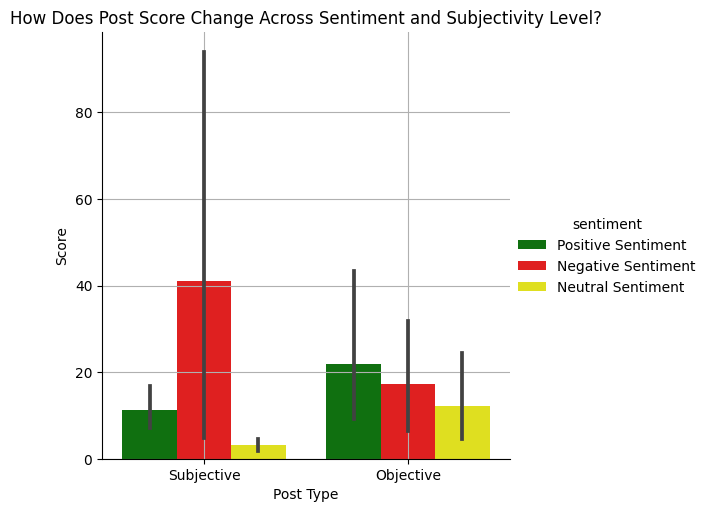

In [36]:
# creating a bar chart that compares the scores of comments across different levels of polarity and subjectivity
bar = sns.catplot(data = scotus,
                  x = "subjective?",
                  y = "score",
                  hue = "sentiment",
                  kind = "bar",
                  palette = sns.color_palette(['green', 'red', 'yellow']))
for ax in bar.axes.flatten():
  ax.set_ylabel('Score')
  ax.set_xlabel('Post Type')
  ax.set_title('How Does Post Score Change Across Sentiment and Subjectivity Level?')
  ax.grid(True)

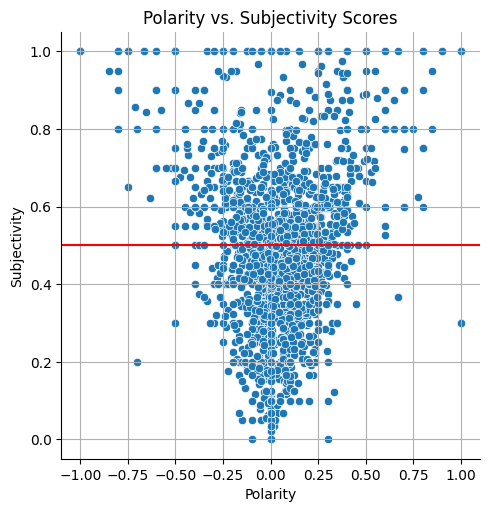

In [37]:
# ceating a relationship plot comparing polarity and subjectivity scores
rlplt = sns.relplot(data = scotus, x = 'polarity', y = 'subjectivity')

for ax in rlplt.axes.flatten():
    ax.set_title('Polarity vs. Subjectivity Scores')
    ax.set_ylabel('Subjectivity')
    ax.set_xlabel('Polarity')
    ax.axhline(y = 0.5,
           xmin = -1,
           xmax = 1,
           color = 'red')
    ax.grid(True)